In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('/Users/ambershen/Desktop/linARG/dx_analysis/figures/2c/data/disk_size_benchmark.csv')
disk_size = df.sum(axis=0)[1:][::-1]
disk_size

vcf_disk_size           310.720273
xsi_disk_size            11.128717
grg_disk_size             9.319446
linear_arg_disk_size      3.504000
dtype: float64

/var/folders/75/tn_w8_tx70dfp53nnb6hyk6h0000gn/T/ipykernel_33081/1508275641.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.barh(y[i], disk_size[i], color=colors[i], label='Disk size (GB)' if i == 0 else "")
/var/folders/75/tn_w8_tx70dfp53nnb6hyk6h0000gn/T/ipykernel_33081/1508275641.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  linarg_size = disk_size[-1]
/var/folders/75/tn_w8_tx70dfp53nnb6hyk6h0000gn/T/ipykernel_33081/1508275641.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFram

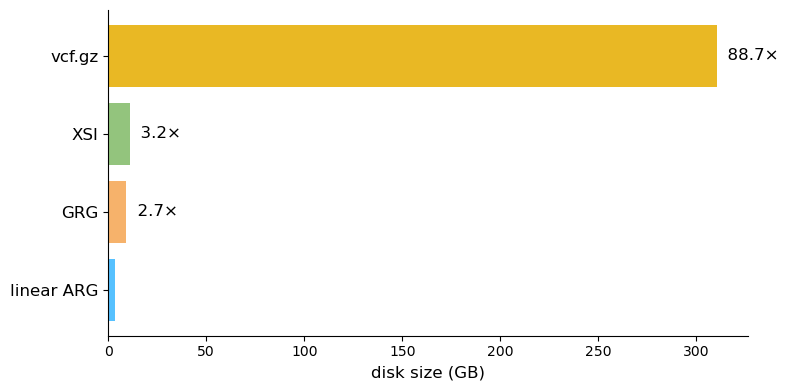

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

methods = ['vcf.gz', 'XSI', 'GRG', 'linear ARG']
disk_size = df.sum(axis=0)[1:][::-1]

y = np.arange(len(methods))

colors = ['#E9B824', '#93c47d', '#f6b26b', '#56C1FF']

fig, ax = plt.subplots(figsize=(8, 4))

# Plot each bar segment individually for full control
for i in range(len(methods)):
    # First subcategory
    ax.barh(y[i], disk_size[i], color=colors[i], label='Disk size (GB)' if i == 0 else "")

# Set y-axis labels and reverse order
ax.set_yticks(y)
ax.set_yticklabels(methods, fontsize=12)
ax.invert_yaxis()

# Labels and title
ax.set_xlabel('disk size (GB)', fontsize=12)

linarg_size = disk_size[-1]
for i in range(len(disk_size)-1):  # Only for scipy and grg
    speedup = disk_size[i] / linarg_size
    ax.text(disk_size[i] + 0.05, y[i], f"  {speedup:.1f}×", va='center', fontsize=12)


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.tight_layout()
plt.show()
